<a href="https://colab.research.google.com/github/mojtabaSefidi/Dataminig-small-projects/blob/main/Wine_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
sn.set()


In [566]:
!gdown --id 1Xw7WqDmbWiPQvK-Uyr8sJs5dLUD-pipq
!gdown --id 12DiliESRRVYibZokLxEwTc6eXNShCkxM

Downloading...
From: https://drive.google.com/uc?id=1Xw7WqDmbWiPQvK-Uyr8sJs5dLUD-pipq
To: /content/winequality-white.csv
100% 269k/269k [00:00<00:00, 38.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12DiliESRRVYibZokLxEwTc6eXNShCkxM
To: /content/winequality-red.csv
100% 85.8k/85.8k [00:00<00:00, 25.9MB/s]


In [587]:
red_wine =  pd.read_csv('winequality-red.csv')
white_wine =  pd.read_csv('winequality-white.csv')

In [598]:
red_wine['type'] = 'red'
white_wine['type'] = 'white'
wine_data = pd.concat([red_wine, white_wine], axis = 0, ignore_index = False).reset_index(drop=True)
wine_data = wine_data.sample(frac=1,axis=0).reset_index(drop=True)
print(wine_data.shape)
wine_data.head(5).T


(6497, 13)


,0,1,2,3,4
fixed acidity,6.7,6.2,6.4,6.7,7
volatile acidity,0.36,0.3,0.37,0.3,0.43
citric acid,0.28,0.32,0.2,0.35,0.3
residual sugar,8.3,1.3,5.6,1.4,2
chlorides,0.034,0.054,0.117,0.18,0.085
free sulfur dioxide,29,27,61,36,6
total sulfur dioxide,81,183,183,160,39
density,0.99151,0.99266,0.99459,0.9937,0.99346
pH,2.96,3.3,3.24,3.11,3.33
sulphates,0.39,0.43,0.43,0.54,0.46


In [589]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


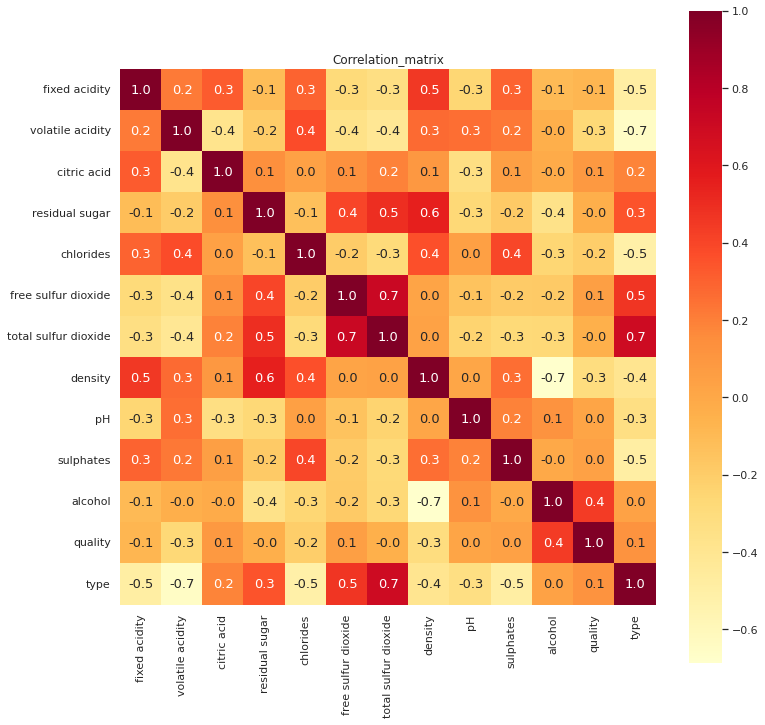

In [568]:
wine_data["type"] = wine_data["type"].map({'red':0,"white":1})
feature_correlation = wine_data.corr()
plt.figure(figsize=(12,12))
plt.title('Correlation_matrix')
sn.heatmap(feature_correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':13}, cmap='YlOrRd')

In [569]:
wine_data[wine_data.columns].corr()['type'][:-1].abs().sort_values(ascending=False).drop_duplicates()

total sulfur dioxide    0.700357
volatile acidity        0.653036
chlorides               0.512678
sulphates               0.487218
fixed acidity           0.486740
free sulfur dioxide     0.471644
density                 0.390645
residual sugar          0.348821
pH                      0.329129
citric acid             0.187397
quality                 0.119323
alcohol                 0.032970
Name: type, dtype: float64

In [570]:
X_wine_type = wine_data[['total sulfur dioxide','free sulfur dioxide','volatile acidity','fixed acidity','chlorides','sulphates']]
Y_wine_type = wine_data['type']

In [571]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_wine_type)
X_standard_scaled = standard_scaler.transform(X_wine_type)

In [572]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_standard_scaled)
X_pca = np.array((pca_result[:,0])).T
y_pca = wine_data['type']
print(pca.explained_variance_ratio_)

[0.44077556]


In [ ]:
tsne = TSNE(n_components=1)
X_tsne = tsne.fit_transform(X_standard_scaled)
y_tsne = wine_data['type']

In [574]:
source = wine_data[['total sulfur dioxide','free sulfur dioxide','volatile acidity','fixed acidity']]
source.set_axis(['total_sulfur_dioxide','free_sulfur_dioxide','volatile_acidity','fixed_acidity'], axis=1, inplace=True)
feature_generation = pd.DataFrame()
feature_generation['sulfur dioxide r2 '] = source.apply(
        lambda row: np.sqrt((row.total_sulfur_dioxide ** 2 + row.free_sulfur_dioxide ** 2 )), axis=1)
feature_generation['acidity r2 '] = source.apply(
        lambda row: np.sqrt((row.volatile_acidity ** 2 + row.fixed_acidity ** 2 )), axis=1)
feature_generation['chlorides'] = wine_data['chlorides']
feature_generation['sulphates'] = wine_data['sulphates']

standard_scaler.fit(feature_generation)
generated_feature_standard_scaled = standard_scaler.transform(feature_generation)
y_wine_generated = wine_data['type']


In [575]:
x_train, x_test, y_train, y_test = train_test_split(X_standard_scaled,Y_wine_type,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [576]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9337995337995338
score on train: 0.9409466911764706
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       544
           1       0.92      1.00      0.96      1601

    accuracy                           0.93      2145
   macro avg       0.95      0.87      0.90      2145
weighted avg       0.94      0.93      0.93      2145

[[ 408  136]
 [   6 1595]]


In [577]:
x_train, x_test, y_train, y_test = train_test_split(X_pca.reshape(-1, 1),y_pca,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [578]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9692307692307692
score on train: 0.9715073529411765
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       497
           1       0.98      0.98      0.98      1648

    accuracy                           0.97      2145
   macro avg       0.95      0.96      0.96      2145
weighted avg       0.97      0.97      0.97      2145

[[ 472   25]
 [  41 1607]]


In [579]:
x_train, x_test, y_train, y_test = train_test_split(X_tsne,y_tsne,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [580]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9888111888111888
score on train: 0.9885110294117647
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       515
           1       0.99      1.00      0.99      1630

    accuracy                           0.99      2145
   macro avg       0.99      0.98      0.98      2145
weighted avg       0.99      0.99      0.99      2145

[[ 498   17]
 [   7 1623]]


In [581]:
x_train, x_test, y_train, y_test = train_test_split(generated_feature_standard_scaled,y_wine_generated,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [582]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.931934731934732
score on train: 0.9227941176470589
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       522
           1       0.92      1.00      0.96      1623

    accuracy                           0.93      2145
   macro avg       0.96      0.86      0.90      2145
weighted avg       0.94      0.93      0.93      2145

[[ 379  143]
 [   3 1620]]


In [583]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_wine_type)
X_min_max_scaled = min_max_scaler.transform(X_wine_type)

In [584]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_min_max_scaled)
X_pca = np.array((pca_result[:,0])).T
y_pca = wine_data['type']
print(pca.explained_variance_ratio_)

[0.49210136]


In [539]:
tsne = TSNE(n_components=1)
X_tsne = tsne.fit_transform(X_min_max_scaled)
y_tsne = wine_data['type']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [540]:

source = wine_data[['total sulfur dioxide','free sulfur dioxide','volatile acidity','fixed acidity']]
source.set_axis(['total_sulfur_dioxide','free_sulfur_dioxide','volatile_acidity','fixed_acidity'], axis=1, inplace=True)
feature_generation = pd.DataFrame()
feature_generation['sulfur dioxide r2 '] = source.apply(
        lambda row: np.sqrt((row.total_sulfur_dioxide ** 2 + row.free_sulfur_dioxide ** 2 )), axis=1)
feature_generation['acidity r2 '] = source.apply(
        lambda row: np.sqrt((row.volatile_acidity ** 2 + row.fixed_acidity ** 2 )), axis=1)
feature_generation['chlorides'] = wine_data['chlorides']
feature_generation['sulphates'] = wine_data['sulphates']

min_max_scaler.fit(feature_generation)
generated_feature_min_max_scaled = min_max_scaler.transform(feature_generation)
y_wine_generated = wine_data['type']


In [541]:
x_train, x_test, y_train, y_test = train_test_split(X_min_max_scaled,Y_wine_type,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [542]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9417249417249417
score on train: 0.9333639705882353
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       528
           1       0.93      1.00      0.96      1617

    accuracy                           0.94      2145
   macro avg       0.96      0.88      0.91      2145
weighted avg       0.95      0.94      0.94      2145

[[ 407  121]
 [   4 1613]]


In [543]:
x_train, x_test, y_train, y_test = train_test_split(X_pca.reshape(-1,1),y_pca,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [544]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9743589743589743
score on train: 0.9701286764705882
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       528
           1       0.98      0.98      0.98      1617

    accuracy                           0.97      2145
   macro avg       0.97      0.97      0.97      2145
weighted avg       0.97      0.97      0.97      2145

[[ 500   28]
 [  27 1590]]


In [545]:
x_train, x_test, y_train, y_test = train_test_split(X_tsne,y_tsne,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [546]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9878787878787879
score on train: 0.9848345588235294
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       524
           1       0.99      0.99      0.99      1621

    accuracy                           0.99      2145
   macro avg       0.98      0.98      0.98      2145
weighted avg       0.99      0.99      0.99      2145

[[ 510   14]
 [  12 1609]]


In [547]:
x_train, x_test, y_train, y_test = train_test_split(generated_feature_min_max_scaled,y_wine_generated,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [548]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9137529137529138
score on train: 0.9306066176470589
              precision    recall  f1-score   support

           0       0.99      0.66      0.80       541
           1       0.90      1.00      0.95      1604

    accuracy                           0.91      2145
   macro avg       0.94      0.83      0.87      2145
weighted avg       0.92      0.91      0.91      2145

[[ 359  182]
 [   3 1601]]


In [549]:
def Decimal_scale(dataframe):
    for x in dataframe:
        p = dataframe[x].max()
        q = str(p).index('.')
        if(int(p)<=0):
          continue
        else:
          dataframe[x] = dataframe[x]/10**q
    return dataframe

In [ ]:
X_decimal_normalization = Decimal_scale(wine_data[['total sulfur dioxide','free sulfur dioxide','volatile acidity','fixed acidity','chlorides','sulphates']])

In [551]:
wine_data[['total sulfur dioxide','free sulfur dioxide','volatile acidity','fixed acidity','chlorides','sulphates']].max()

total sulfur dioxide    440.000
free sulfur dioxide     289.000
volatile acidity          1.580
fixed acidity            15.900
chlorides                 0.611
sulphates                 2.000
dtype: float64

In [552]:
X_decimal_normalization.max()

total sulfur dioxide    0.440
free sulfur dioxide     0.289
volatile acidity        0.158
fixed acidity           0.159
chlorides               0.611
sulphates               0.200
dtype: float64

In [553]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_decimal_normalization)
X_pca = np.array((pca_result[:,0])).T
y_pca = wine_data['type']
print(pca.explained_variance_ratio_)

[0.66944629]


In [ ]:
tsne = TSNE(n_components=1)
X_tsne = tsne.fit_transform(X_decimal_normalization)
y_tsne = wine_data['type']

In [555]:
source = wine_data[['total sulfur dioxide','free sulfur dioxide','volatile acidity','fixed acidity']]
source.set_axis(['total_sulfur_dioxide','free_sulfur_dioxide','volatile_acidity','fixed_acidity'], axis=1, inplace=True)
feature_generation = pd.DataFrame()
feature_generation['sulfur dioxide r2 '] = source.apply(
        lambda row: np.sqrt((row.total_sulfur_dioxide ** 2 + row.free_sulfur_dioxide ** 2 )), axis=1)
feature_generation['acidity r2 '] = source.apply(
        lambda row: np.sqrt((row.volatile_acidity ** 2 + row.fixed_acidity ** 2 )), axis=1)
feature_generation['chlorides'] = wine_data['chlorides']
feature_generation['sulphates'] = wine_data['sulphates']
generated_feature_Decimal_scale = Decimal_scale(feature_generation)

y_wine_generated = wine_data['type']

In [556]:
x_train, x_test, y_train, y_test = train_test_split(X_decimal_normalization,Y_wine_type,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [557]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9328671328671329
score on train: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       518
           1       0.92      1.00      0.96      1627

    accuracy                           0.93      2145
   macro avg       0.95      0.86      0.90      2145
weighted avg       0.94      0.93      0.93      2145

[[ 379  139]
 [   5 1622]]


In [558]:
x_train, x_test, y_train, y_test = train_test_split(X_pca.reshape(-1,1),y_pca,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [559]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9468531468531468
score on train: 0.9432444852941176
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       519
           1       0.95      0.98      0.97      1626

    accuracy                           0.95      2145
   macro avg       0.94      0.91      0.93      2145
weighted avg       0.95      0.95      0.95      2145

[[ 438   81]
 [  33 1593]]


In [560]:
x_train, x_test, y_train, y_test = train_test_split(X_tsne,y_tsne,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [561]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9874125874125874
score on train: 0.9875919117647058
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       520
           1       0.99      0.99      0.99      1625

    accuracy                           0.99      2145
   macro avg       0.98      0.98      0.98      2145
weighted avg       0.99      0.99      0.99      2145

[[ 506   14]
 [  13 1612]]


In [562]:
x_train, x_test, y_train, y_test = train_test_split(generated_feature_Decimal_scale,y_wine_generated,test_size=0.33,shuffle=True)
clf = RandomForestClassifier(max_depth=1, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [563]:
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

score on test: 0.9268065268065268
score on train: 0.9299172794117647
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       536
           1       0.91      1.00      0.95      1609

    accuracy                           0.93      2145
   macro avg       0.95      0.86      0.89      2145
weighted avg       0.93      0.93      0.92      2145

[[ 387  149]
 [   8 1601]]


In [597]:
conclusion = pd.DataFrame([['Z-Score Normalization', 0.93379 , 0.96923 , 0.98881 , 0.93193],
              ['Min-Max Normalization', 0.94172 , 0.97435 , 0.98787 , 0.91375],
              ['Decimal Scaling', 0.93286 , 0.94685 , 0.98741 , 0.92680]],
              columns =["Normalization Algorithm","Default Features","Using PCA Algorithm ","Using TSNE Algorithm","Generated Features"])
conclusion = conclusion.set_index('Normalization Algorithm')
conclusion.style.background_gradient(cmap="YlOrRd")

,Default Features,Using PCA Algorithm,Using TSNE Algorithm,Generated Features
Normalization Algorithm,,,,
Z-Score Normalization,0.933790,0.969230,0.988810,0.931930
Min-Max Normalization,0.941720,0.974350,0.987870,0.913750
Decimal Scaling,0.932860,0.946850,0.987410,0.926800
